# hidden layer 없는 Simple Logitstic Regression model - 1 layer

<img src="LogReg_kiank.png" style="width:650px;height:400px;">

**알고리즘의 수학적 표현**:

한개의 data (사진 한장) $x^{(i)}$ 에 대하여 :
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

cost 는 모든 training data 의 개별 loss 를 합하여 계산 :
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

<출처> Andrew Ng. - Neural Network and Deep Learning (Coursera)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from lr_utils import load_dataset

In [2]:
X_train, X_test, y_train, y_test, classes = load_dataset()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(classes)

(209, 64, 64, 3)
(50, 64, 64, 3)
(1, 209)
(1, 50)
[b'non-cat' b'cat']


### data 시각화

y = 1 이므로 cat 사진 입니다.


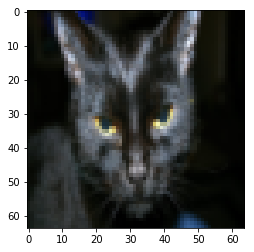

In [4]:
# Example of picture
index = 25
plt.imshow(X_train[index])
print("y = " + str(y_train[0, index]) + " 이므로 " + 
                  classes[y_train[0, index]].decode("utf-8") + " 사진 입니다.")

64 x 64 x 3 = 12,288 pixels

In [5]:
# Flatten image
X_train_flatten = X_train.reshape(X_train.shape[0], 64*64*3) / 255.
X_test_flatten = X_test.reshape(X_test.shape[0], 64*64*3) / 255.

y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

print(X_train_flatten.shape)
print(y_train.shape)
print(X_test_flatten.shape)
print(y_test.shape)

(209, 12288)
(209,)
(50, 12288)
(50,)


### Model 구성

In [6]:
model = tf.keras.Sequential()

model.add(layers.Dense(1, input_shape=(12288,)))
model.add(layers.Activation("sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12289     
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


### model compile

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

### model training

In [9]:
model.fit(X_train_flatten, y_train, epochs=100, validation_data=(X_test_flatten, y_test))

Train on 209 samples, validate on 50 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
209/209 [==============================] - 0s 887us/sample - loss: 1.0295 - acc: 0.5359 - val_loss: 1.7596 - val_acc: 0.3400
Epoch 2/100
209/209 [==============================] - 0s 207us/sample - loss: 0.8233 - acc: 0.6555 - val_loss: 0.5655 - val_acc: 0.7200
Epoch 3/100
209/209 [==============================] - 0s 182us/sample - loss: 0.7226 - acc: 0.6316 - val_loss: 0.7106 - val_acc: 0.4600
Epoch 4/100
209/209 [==============================] - 0s 191us/sample - loss: 0.6501 - acc: 0.6316 - val_loss: 1.2410 - val_acc: 0.3400
Epoch 5/100
209/209 [==============================] - 0s 201us/sample - loss: 0.5985 - acc: 0.6890 - val_loss: 0.6520 - val_acc: 0.6000
Epoch 6/100
209/209 [==============================] - 0s 186us/sample - loss: 0.5342 - acc: 0.7129 - val_loss: 0.7025 - val_acc: 0.5200
Epoch 7/100
209/209 [==============================] - 0s 191us/sample - loss: 0.5115

209/209 [==============================] - 0s 182us/sample - loss: 0.2004 - acc: 0.9522 - val_loss: 0.8425 - val_acc: 0.6200
Epoch 59/100
209/209 [==============================] - 0s 182us/sample - loss: 0.1994 - acc: 0.9665 - val_loss: 0.7610 - val_acc: 0.7200
Epoch 60/100
209/209 [==============================] - 0s 172us/sample - loss: 0.1878 - acc: 0.9665 - val_loss: 0.7476 - val_acc: 0.7200
Epoch 61/100
209/209 [==============================] - 0s 168us/sample - loss: 0.1983 - acc: 0.9569 - val_loss: 0.6850 - val_acc: 0.7400
Epoch 62/100
209/209 [==============================] - 0s 177us/sample - loss: 0.1943 - acc: 0.9522 - val_loss: 0.6300 - val_acc: 0.7200
Epoch 63/100
209/209 [==============================] - 0s 167us/sample - loss: 0.2283 - acc: 0.9187 - val_loss: 0.6642 - val_acc: 0.7200
Epoch 64/100
209/209 [==============================] - 0s 177us/sample - loss: 0.2515 - acc: 0.8900 - val_loss: 1.0724 - val_acc: 0.5200
Epoch 65/100
209/209 [=========================

In [10]:
score = model.evaluate(X_test_flatten, y_test)

50/50 [==============================] - 0s 379us/sample - loss: 0.9107 - acc: 0.6600


In [11]:
print(model.metrics_names)
print("Test score : {:.2f}".format(score[0]))
print("Test accuracy : {:.2f}".format(score[1]))

['loss', 'acc']
Test score : 0.91
Test accuracy : 0.66


In [12]:
sum(y_test)

33

In [13]:
y_pred = model.predict(X_test_flatten)
np.sum((y_pred > 0.5))

26

# 1 hidden layer Logitstic Regression model - 2 layers

<img src="LogReg_2layers.png" style="width:650px;height:400px;">


In [14]:
tf.keras.backend.clear_session()

In [15]:
model = tf.keras.Sequential()

model.add(layers.Dense(7, input_shape=(12288,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(1))
model.add(layers.Activation("sigmoid"))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 86023     
_________________________________________________________________
activation (Activation)      (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 86,031
Trainable params: 86,031
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [18]:
model.fit(X_train_flatten, y_train, epochs=100, validation_data=(X_test_flatten, y_test))

Train on 209 samples, validate on 50 samples
Epoch 1/100
209/209 [==============================] - 0s 1ms/sample - loss: 0.8339 - acc: 0.5885 - val_loss: 1.1641 - val_acc: 0.3400
Epoch 2/100
209/209 [==============================] - 0s 265us/sample - loss: 0.6849 - acc: 0.5550 - val_loss: 1.1116 - val_acc: 0.3400
Epoch 3/100
209/209 [==============================] - 0s 225us/sample - loss: 0.6612 - acc: 0.5789 - val_loss: 1.2437 - val_acc: 0.3400
Epoch 4/100
209/209 [==============================] - 0s 211us/sample - loss: 0.6446 - acc: 0.6746 - val_loss: 0.5906 - val_acc: 0.7200
Epoch 5/100
209/209 [==============================] - 0s 206us/sample - loss: 0.5806 - acc: 0.6986 - val_loss: 0.6270 - val_acc: 0.6200
Epoch 6/100
209/209 [==============================] - 0s 215us/sample - loss: 0.5649 - acc: 0.6938 - val_loss: 1.0868 - val_acc: 0.3400
Epoch 7/100
209/209 [==============================] - 0s 225us/sample - loss: 0.5489 - acc: 0.6986 - val_loss: 0.6586 - val_acc: 0.560

209/209 [==============================] - 0s 225us/sample - loss: 0.2414 - acc: 0.8947 - val_loss: 1.1037 - val_acc: 0.4600
Epoch 61/100
209/209 [==============================] - 0s 206us/sample - loss: 0.2483 - acc: 0.9234 - val_loss: 0.9140 - val_acc: 0.6000
Epoch 62/100
209/209 [==============================] - 0s 215us/sample - loss: 0.2497 - acc: 0.9187 - val_loss: 0.6749 - val_acc: 0.7400
Epoch 63/100
209/209 [==============================] - 0s 211us/sample - loss: 0.2222 - acc: 0.9187 - val_loss: 0.6149 - val_acc: 0.7400
Epoch 64/100
209/209 [==============================] - 0s 215us/sample - loss: 0.1795 - acc: 0.9665 - val_loss: 0.7246 - val_acc: 0.7400
Epoch 65/100
209/209 [==============================] - 0s 211us/sample - loss: 0.1801 - acc: 0.9665 - val_loss: 0.6705 - val_acc: 0.7600
Epoch 66/100
209/209 [==============================] - 0s 211us/sample - loss: 0.1713 - acc: 0.9713 - val_loss: 0.6866 - val_acc: 0.7400
Epoch 67/100
209/209 [=========================

In [19]:
score = model.evaluate(X_test_flatten, y_test)

50/50 [==============================] - 0s 320us/sample - loss: 0.9131 - acc: 0.6800


In [20]:
print(model.metrics_names)
print("Test score : {:.2f}".format(score[0]))
print("Test accuracy : {:.2f}".format(score[1]))

['loss', 'acc']
Test score : 0.91
Test accuracy : 0.68
